<a href="https://colab.research.google.com/github/ap766/TripDurationAnalysis/blob/main/visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=dbaa11f4198b68a24c8f9da754f9367c365a320eb7bf795ca6cf7a0aa6ca1c1e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


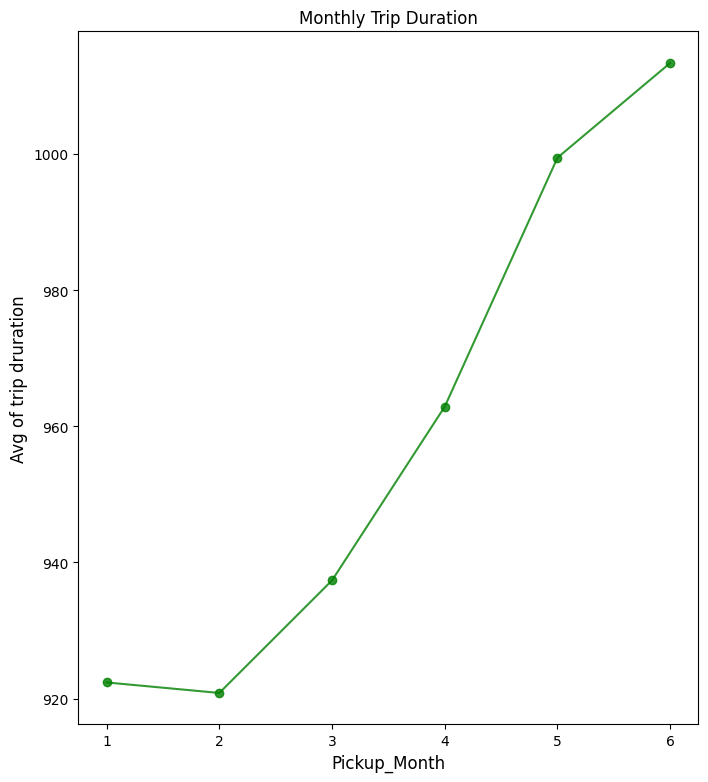

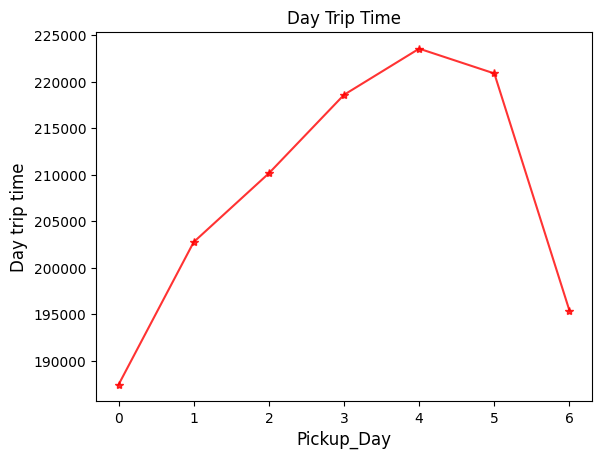

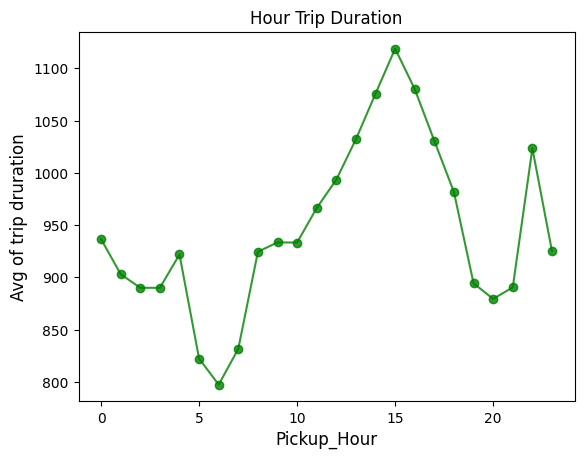

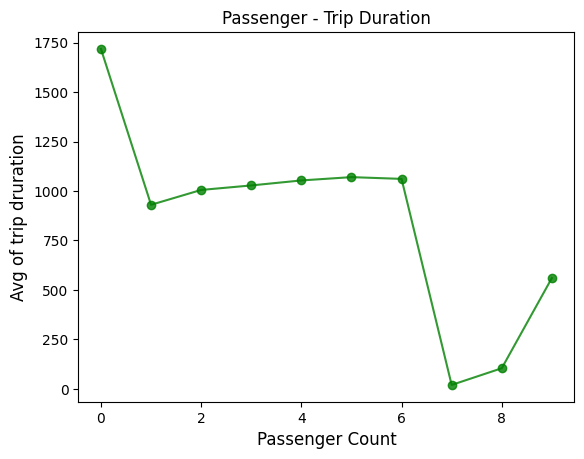

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from datetime import datetime
from math import sin, radians, cos, asin, sqrt

def distance(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    diff_lon = lon2 - lon1
    diff_lat = lat2 - lat1
    a = sin(diff_lat/2)**2 + cos(lat1) * cos(lat2) * sin(diff_lon/2)**2
    c = 2 * asin(sqrt(a))
    radius = 6371
    return c * radius

df = pd.read_csv("/content/drive/MyDrive/train.csv")

df.pickup_datetime = df.pickup_datetime.apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df["pickup_month"] = df["pickup_datetime"].map(lambda x: x.month)

df["pickup_week"]=df.pickup_datetime.apply(lambda x: x.weekday())

df["pickup_day"]=df.pickup_datetime.apply(lambda x: x.day)

df["pickup_hour"] = df.pickup_datetime.apply(lambda x: x.hour)

#df["trip_distance"] = df["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"].apply(lambda x: distance(x))

month_trip=df.groupby(['pickup_month'])["trip_duration"].agg(["sum","mean","count"])
month_trip=month_trip.reset_index()

month_trip.rename(columns={'sum':'month_sum_trip_dur','mean':'month_avg_trip_dur','count':"month_trip_times"}, inplace = True)

day_trip=df.groupby(['pickup_week'])["trip_duration"].agg(["sum","mean","count"])
day_trip=day_trip.reset_index()
day_trip.rename(columns={'sum':'day_sum_trip_duration','mean':'day_avg_trip_dur','count':"day_trip_times"}, inplace = True)

hour_trip = df.groupby(['pickup_hour'])["trip_duration"].agg(["mean"])
hour_trip = hour_trip.reset_index()
hour_trip.rename(columns={'mean':'hour_avg_trip_duration'}, inplace = True)

pass_trip = df.groupby(['passenger_count'])["trip_duration"].agg(["mean"])
pass_trip = pass_trip.reset_index()
pass_trip.rename(columns={'mean':'people_avg_trip_duration'}, inplace = True)

#dist_trip = df.groupby(['trip_distance'])["trip_duration"].agg(["mean"])
#dist_trip = dist_trip.reset_index()
#dist_trip.rename(columns={'mean':'dist_avg_trip_duration'}, inplace = True)

plt.figure(figsize=(8,9))

ax1= plt.plot(month_trip.pickup_month, month_trip.month_avg_trip_dur, color="green",alpha=0.8,marker='o')
plt.title("Monthly Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Pickup_Month', fontsize=12)
plt.show()

ax1= plt.plot(day_trip.pickup_week, day_trip.day_trip_times, color="red", alpha=0.8,marker='*')
plt.title("Day Trip Time")
plt.ylabel('Day trip time', fontsize=12)
plt.xlabel('Pickup_Day', fontsize=12)
plt.show()

ax1= plt.plot(hour_trip.pickup_hour, hour_trip.hour_avg_trip_duration, color="green",alpha=0.8,marker='o')
plt.title("Hour Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Pickup_Hour', fontsize=12)
plt.show()

ax1= plt.plot(pass_trip.passenger_count, pass_trip.people_avg_trip_duration, color="green",alpha=0.8,marker='o')
plt.title("Passenger - Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Passenger Count', fontsize=12)
plt.show()